In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from common import Images, Fonts, Data
from matplotlib.patches import Rectangle, Ellipse, Arc, FancyArrowPatch
from matplotlib.lines import Line2D

In [4]:
season = "2023"
df = Data.get_nwsl_goals(season = season)
df = df.rename(columns={"period": "half", "minute": "min", "second": "sec"})
df

,season,date,home,away,player,team,assist,half,min,sec,x,y
2161,2023,2023-03-25,NC,KC,Mille Gejl Jensen,NC,Narumi Miura,1,22,24,70.4,63.8
2162,2023,2023-03-25,SD,CHI,Yuki Ogimi Nagasato,CHI,NaN,1,17,41,97.6,47.4
2163,2023,2023-03-25,SD,CHI,Amirah Ali,SD,NaN,1,21,34,98.3,48.4
2164,2023,2023-03-25,SD,CHI,Jaedyn Shaw,SD,NaN,1,31,7,81.6,50.4
2165,2023,2023-03-25,SD,CHI,Mallory Pugh Swanson,CHI,NaN,1,48,18,88.5,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2500,2023,2023-10-20,RGN,LA,Veronica Latsko,RGN,Phoebe McClernon,2,86,32,91.0,47.0
2501,2023,2023-10-22,NC,NJY,Delanie Sheehan,NJY,Bruninha,1,44,56,89.9,31.0
2502,2023,2023-10-22,NC,NJY,Yazmeen Ryan,NJY,Lynn Williams,2,90,40,87.4,43.3
2503,2023,2023-11-05,POR,NJY,Katie Stengel,NJY,Kristie Mewis,4,106,10,81.5,37.3


In [5]:
# Remove own goals
df = df[df["x"] > 50]
# Remove playoffs
# df = df[df["date"] < "2022-10-16"]

In [6]:
s = 5.75

In [7]:
# 0: penalty spot
# 1: goal box
# 2: left penalty area
# 3: right penalty area
# 4: left outside penalty area
# 5: right outside penalty area
def classify_row(row):
    x = row["x"]
    y = row["y"]
    if x == 100 - 2 * s and y == 50:
        return 0
    elif x >= 100 - s and y < 63 and y > 37:
        return 1
    elif x >= 100 - 3 * s and y >= 23 and y < 50:
        return 2
    elif x >= 100 - 3 * s and y <= 77 and y >= 50:
        return 3
    elif y < 50:
        return 4
    else:
        return 5


df["zone"] = df.apply(classify_row, axis=1)

<ipython-input-7-554916f8f235>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["zone"] = df.apply(classify_row, axis=1)


In [8]:
# See the breakdown by zone
df.groupby(["zone"]).agg(count=("team", "count")).reset_index()

,zone,count
0,0,35
1,1,73
2,2,79
3,3,102
4,4,15
5,5,26


<Figure size 720x360 with 0 Axes>

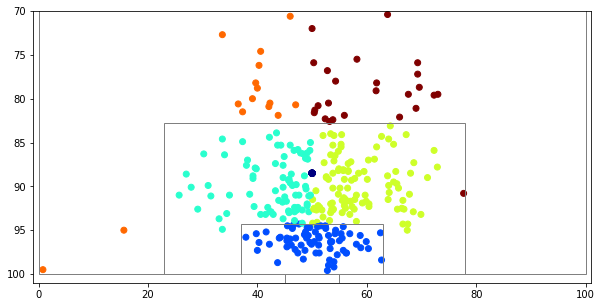

In [11]:
plt.clf()
plt.rcParams["figure.figsize"] = (10, 5)

fig, ax = plt.subplots()
plt.scatter(df["y"], df["x"], c=df["zone"], cmap="jet")
plt.ylim([70, 101])
plt.xlim([-1, 101])
ax.invert_yaxis()
lines = "grey"
lw=1

# Endline
ax.add_patch(Rectangle((0, 50), 100, 50, ec=lines, fill=False, lw=lw))
# 18-yard box
ax.add_patch(Rectangle((23, 100 - 3 * s), 55, 3 * s, ec=lines, fill=False, lw=lw))
# 6-yard box
ax.add_patch(Rectangle((37, 100 - s), 26, s, ec=lines, fill=False, lw=lw))
# Goal
ax.add_patch(Rectangle((45, 100), 10, 1, ec=lines, fill=False, lw=lw))

In [282]:
grouped = df.groupby(["zone", "player"]).agg(count=("team", "count")).sort_values(
    ["zone", "count"], ascending=False
)

for letter in range(0, df["zone"].max() + 1):
    print(letter)
    print(grouped.loc[letter].iloc[0:7])

0
                    count
player                   
Megan Rapinoe          12
Christine Sinclair     11
Sarah Woldmoe           9
Alex Morgan             8
Lo’eau LaBonta          8
Rachel Daly             8
Ashley Hatch            6
1
                    count
player                   
Lynn Williams          17
Jessica McDonald       13
Christine Sinclair     12
Debinha                11
Kristen Hamilton        9
Rachel Hill             9
Shea Groom              9
2
                  count
player                 
Lynn Williams        22
Sam Kerr             19
Ashley Hatch         16
Debinha              14
Jessica McDonald     13
Sofia Huerta         13
Rachel Daly          12
3
                    count
player                   
Sam Kerr               26
Alex Morgan            20
Lynn Williams          19
Debinha                16
Ashley Hatch           15
Christine Sinclair     13
Jessica McDonald       13
4
                  count
player                 
Sofia Huerta          6


In [110]:
field = "white"
lines = "black"
lw = 3

(-0.5, 199.5, 199.5, -0.5)

<Figure size 720x468 with 0 Axes>

<Figure size 12000x7800 with 0 Axes>

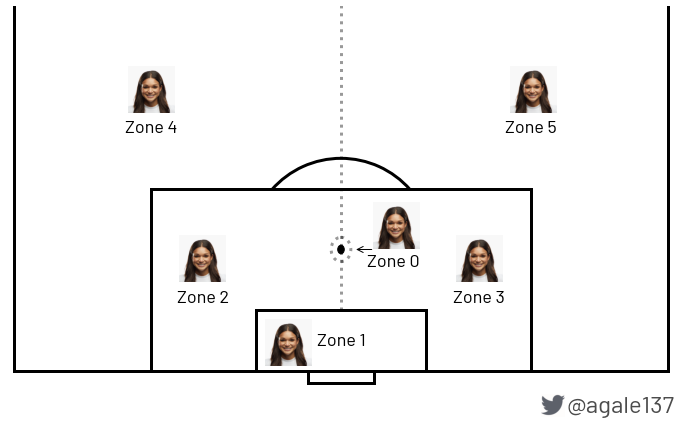

In [274]:
# Set up plot
plt.clf()
plt.rcParams["figure.figsize"] = (10, 6.5)
plt.figure(dpi=1200, facecolor=field)
fig, ax = plt.subplots()
fig.tight_layout()

# Axes
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.tick_params(bottom=False, left=False)
ax.set_xticks([])
ax.set_yticks([])
plt.ylim([70, 105])
plt.xlim([-1, 101])
ax.invert_yaxis()

# Zone markings
ax.add_artist(
    Line2D(
        (50, 50),
        (100 - 5, 50),
        lw=lw,
        color=lines,
        alpha=0.4,
        linestyle="dotted",
    )
)
ax.add_patch(
    Ellipse(
        (50, 100 - 10),
        3,
        2,
        ec=(0, 0, 0, 0.4),
        fill=True,
        fc=field,
        lw=lw,
        linestyle="dotted",
    )
)

# Field markings
# Endline
ax.add_patch(Rectangle((0, 50), 100, 50, ec=lines, fill=False, lw=lw))
# 18-yard box
ax.add_patch(Rectangle((21, 100 - 15), 58, 15, ec=lines, fill=False, lw=lw))
# 6-yard box
ax.add_patch(Rectangle((37, 100 - 5), 26, 5, ec=lines, fill=False, lw=lw))
# Goal
ax.add_patch(Rectangle((45, 100), 10, 1, ec=lines, fill=False, lw=lw))
# Penalty arc
ax.add_artist(
    Arc((50, 100 - 10), 28, 15, angle=0, theta1=205, theta2=335, ec=lines, lw=lw)
)
# Penalty spot
ax.add_patch(Ellipse((50, 100 - 10), 1, 0.7, color=lines))

# Plot data
# Zone 1
plt.text(
    50,
    100 - 2.5,
    "Zone 1",
    ha="center",
    va="center",
    fontsize=18,
    fontproperties=Fonts.BARLOW,
)
# Zone 2
plt.text(
    29,
    100 - 6,
    "Zone 2",
    ha="center",
    va="center",
    fontsize=18,
    fontproperties=Fonts.BARLOW,
)
# Zone 3
plt.text(
    71,
    100 - 6,
    "Zone 3",
    ha="center",
    va="center",
    fontsize=18,
    fontproperties=Fonts.BARLOW,
)
# Zone 4
plt.text(
    21,
    80,
    "Zone 4",
    ha="center",
    va="center",
    fontsize=18,
    fontproperties=Fonts.BARLOW,
)
# Zone 5
plt.text(
    100 - 21,
    80,
    "Zone 5",
    ha="center",
    va="center",
    fontsize=18,
    fontproperties=Fonts.BARLOW,
)
# Zone 0
plt.text(
    54,
    100 - 9,
    "Zone 0",
    ha="left",
    va="center",
    fontsize=18,
    fontproperties=Fonts.BARLOW,
)
ax.add_patch(
    FancyArrowPatch(
        (55, 100 - 10),
        (52, 100 - 10),
        arrowstyle="->",
        mutation_scale=15,
        clip_on=False,
    )
)

# Twitter logo and username
plt.text(
    1,
    0.06,
    "@agale137",
    transform=ax.transAxes,
    color="black",
    fontsize=24,
    alpha=0.7,
    fontproperties=Fonts.BARLOW,
    va="center",
    ha="right",
)

newax = fig.add_axes([0.77, 0.09, 0.05, 0.05], anchor="SE", zorder=1)
newax.imshow(Images.TWITTER)
newax.axis("off")

# Zone 1
newax = fig.add_axes([0.37, 0.2, 0.1, 0.1], anchor="SE", zorder=1)
newax.imshow(plt.imread("images/sophia_smith.png"))
newax.axis("off")

# Zone 2
newax = fig.add_axes([0.25, 0.38, 0.1, 0.1], anchor="SE", zorder=1)
newax.imshow(plt.imread("images/sophia_smith.png"))
newax.axis("off")

# Zone 3
newax = fig.add_axes([0.635, 0.38, 0.1, 0.1], anchor="SE", zorder=1)
newax.imshow(plt.imread("images/sophia_smith.png"))
newax.axis("off")

# Zone 4
newax = fig.add_axes([0.18, 0.74, 0.1, 0.1], anchor="SE", zorder=1)
newax.imshow(plt.imread("images/sophia_smith.png"))
newax.axis("off")

# Zone 5
newax = fig.add_axes([0.71, 0.74, 0.1, 0.1], anchor="SE", zorder=1)
newax.imshow(plt.imread("images/sophia_smith.png"))
newax.axis("off")

# Zone 0
newax = fig.add_axes([0.52, 0.45, 0.1, 0.1], anchor="SE", zorder=1)
newax.imshow(plt.imread("images/sophia_smith.png"))
newax.axis("off")